In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_csv('training_set.csv', sep = ',', header = 0, dtype = {'passband': np.object})
df_train.passband = 'passband_'+ df_train.passband
df_train.passband = df_train.passband.astype('category')

df_train_meta = pd.read_csv('training_set_metadata.csv', sep = ',', header = 0, index_col = 'object_id',
                            dtype = {'target': np.object}
                           )
df_train_meta.target = 'class_'+ df_train_meta.target
df_train_meta.target = df_train_meta.target.astype('category')
df_train = df_train.merge(df_train_meta[['target']], how = 'left', left_on = 'object_id', right_index = True)

print (df_train.shape)
df_train.dtypes

(1421705, 7)


object_id       int64
mjd           float64
passband     category
flux          float64
flux_err      float64
detected        int64
target       category
dtype: object

In [6]:
galactic = df_train_meta['hostgal_photoz'] == 0
galactic_classes = df_train_meta[galactic].target.unique()
extragalactic_classes = df_train_meta[~galactic].target.unique()
print (galactic_classes)
print (extragalactic_classes)

[class_92, class_65, class_16, class_6, class_53]
Categories (5, object): [class_92, class_65, class_16, class_6, class_53]
[class_88, class_42, class_90, class_67, class_95, class_62, class_15, class_52, class_64]
Categories (9, object): [class_88, class_42, class_90, class_67, ..., class_62, class_15, class_52, class_64]


In [ ]:
def transform(self, a):
        """
        Inplace transformation.
        """
        with np.errstate(invalid="ignore"):
            masked = np.abs(a) > self.linthresh
        sign = np.sign(a[masked])
        log = (self._linscale_adj + np.log(np.abs(a[masked]) / self.linthresh))
        log *= sign * self.linthresh
        a[masked] = log
        a[~masked] *= self._linscale_adj
        return a

In [ ]:
-2.5*log10(measured flux)

## Galactic classes

Class: class_92 

Object ID: 615


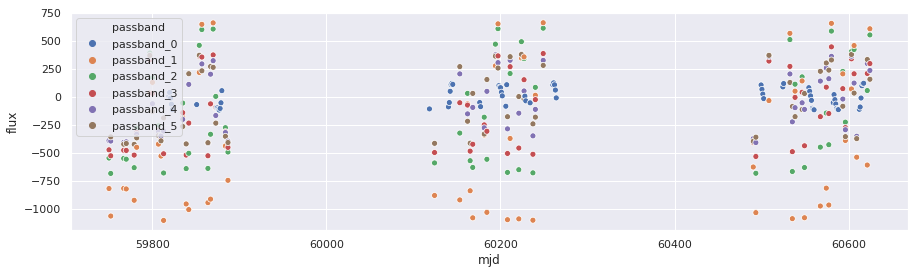

Object ID: 49389


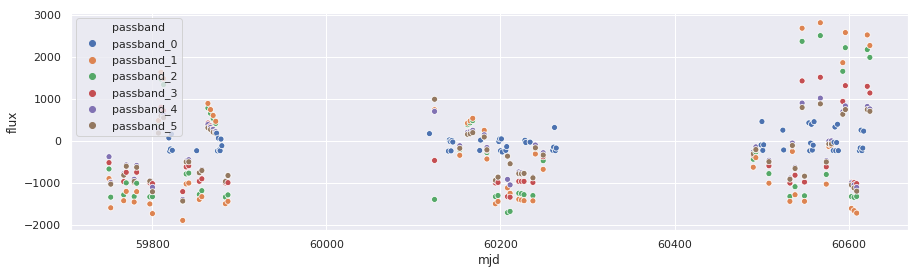

Object ID: 198690


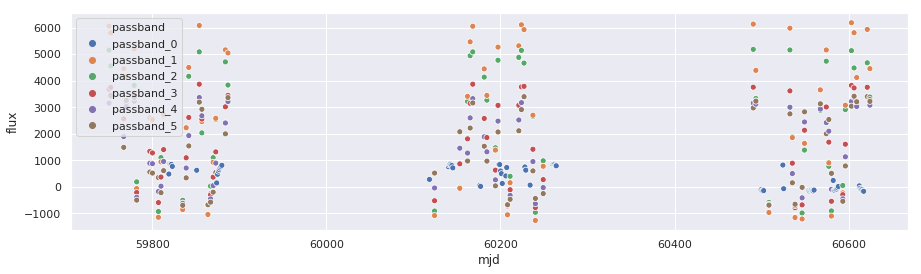

Object ID: 89157


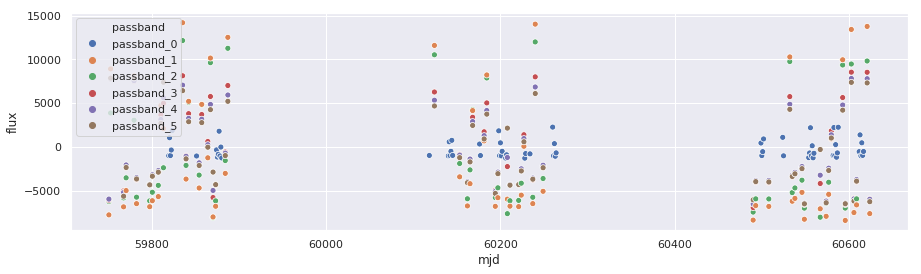

Object ID: 88073


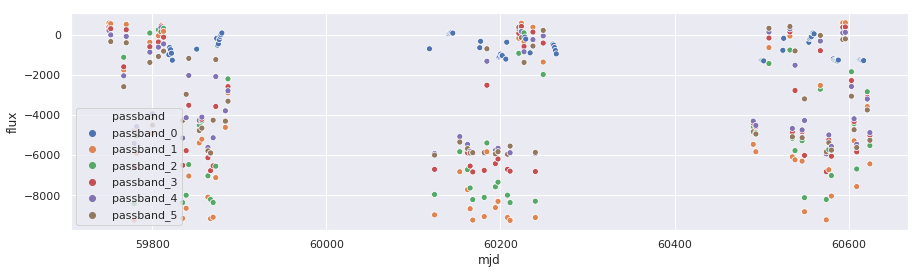

Class: class_65 

Object ID: 313359


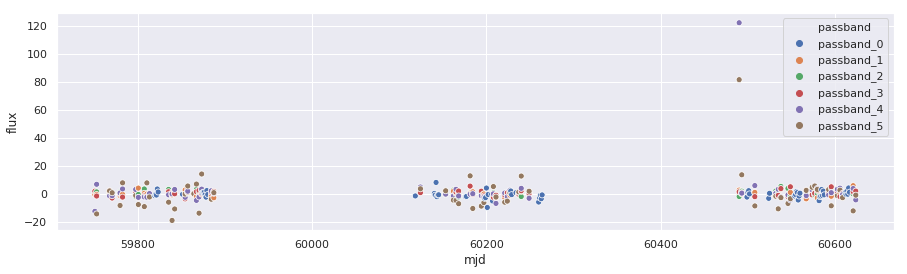

Object ID: 92334


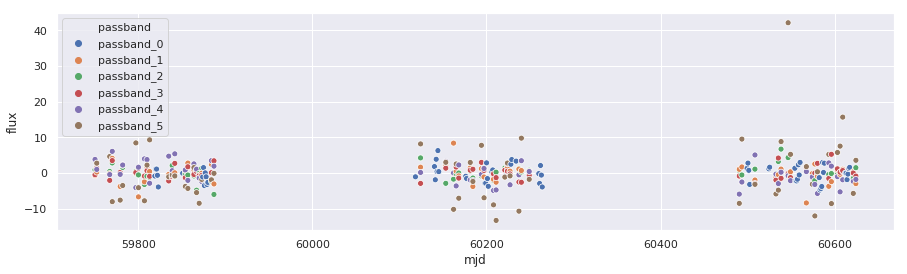

Object ID: 249983


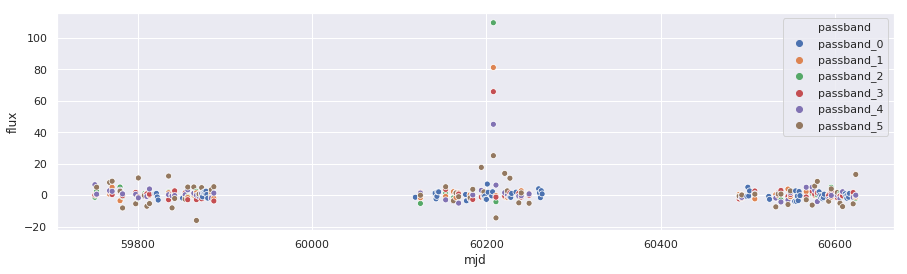

Object ID: 337743


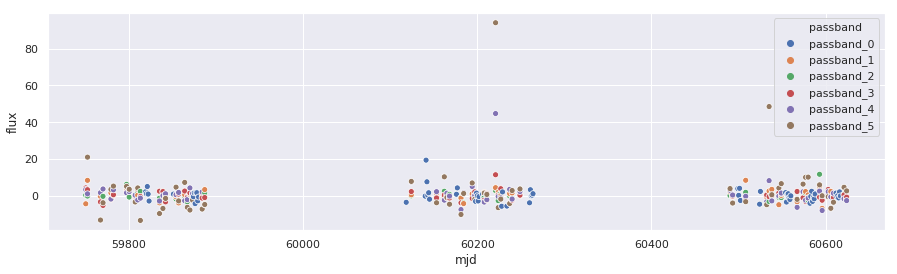

Object ID: 253015


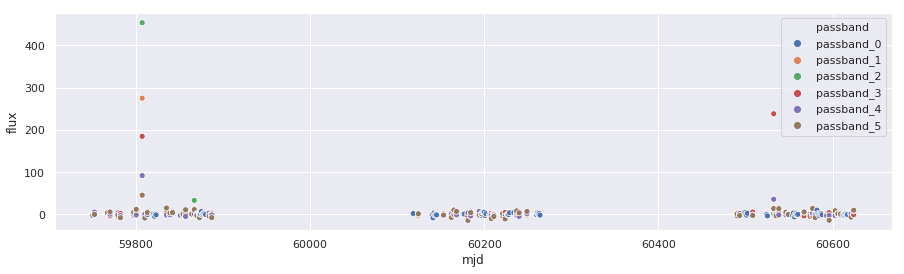

Class: class_16 

Object ID: 273339


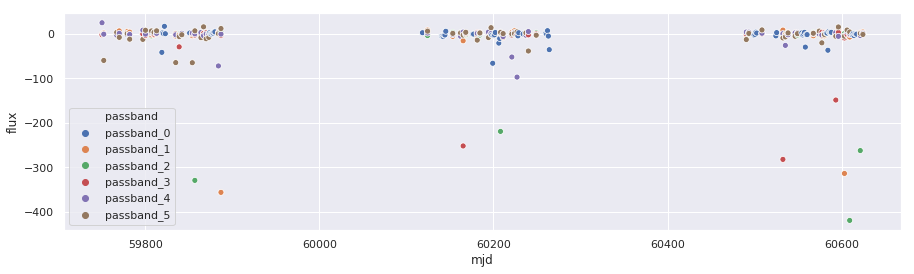

Object ID: 216970


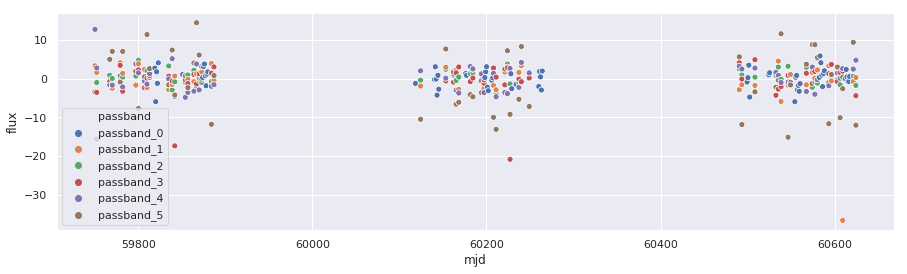

Object ID: 30673


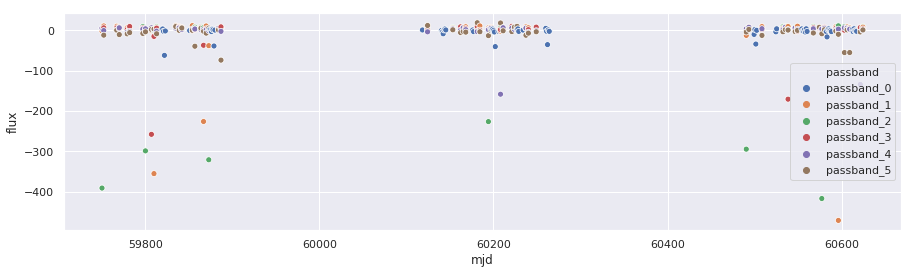

Object ID: 30895


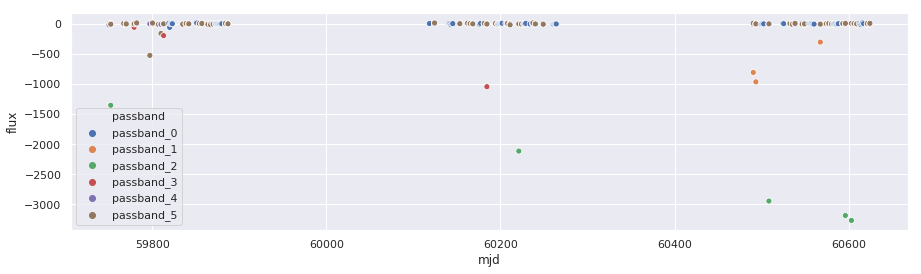

Object ID: 308282


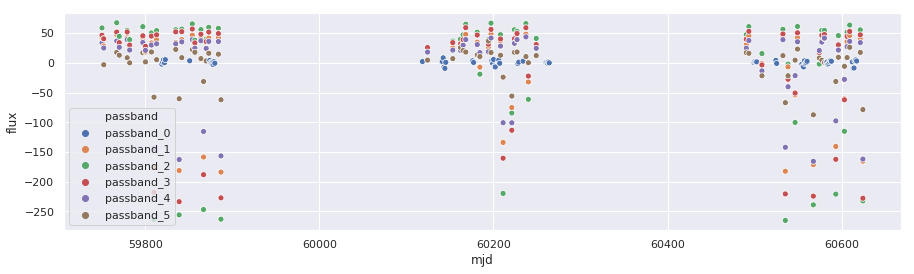

Class: class_6 

Object ID: 332684


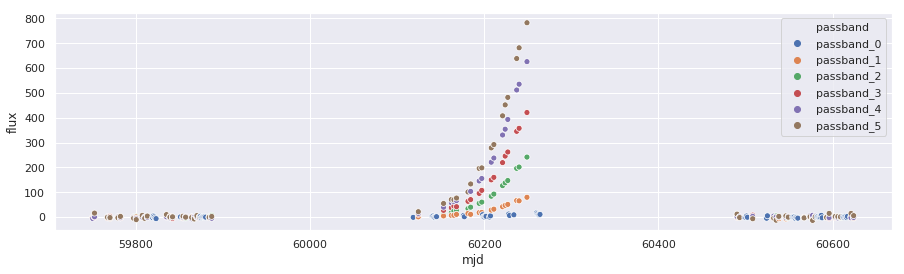

Object ID: 83348


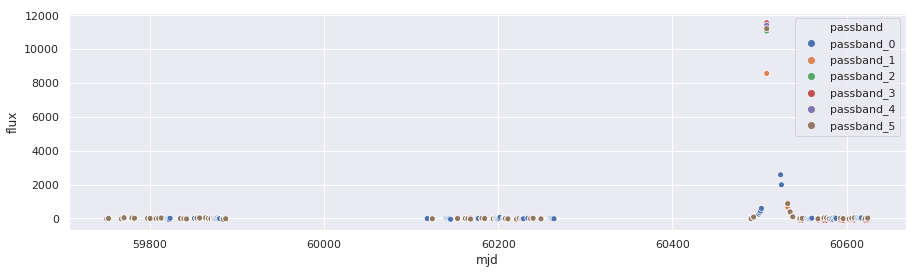

Object ID: 282647


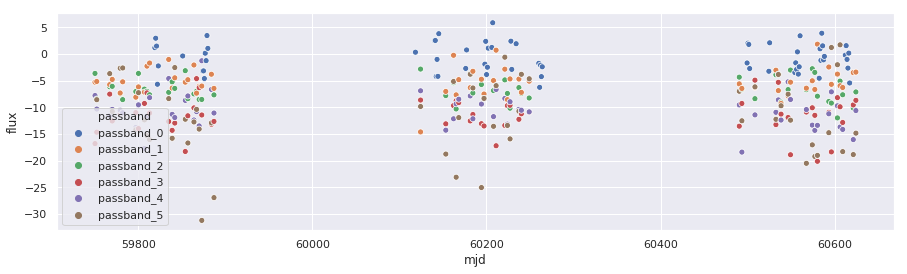

Object ID: 201890


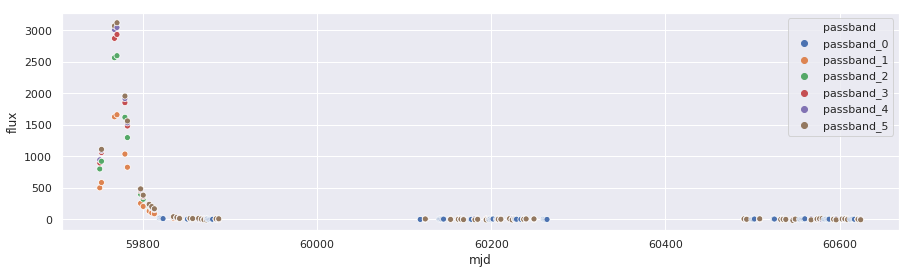

Object ID: 198103


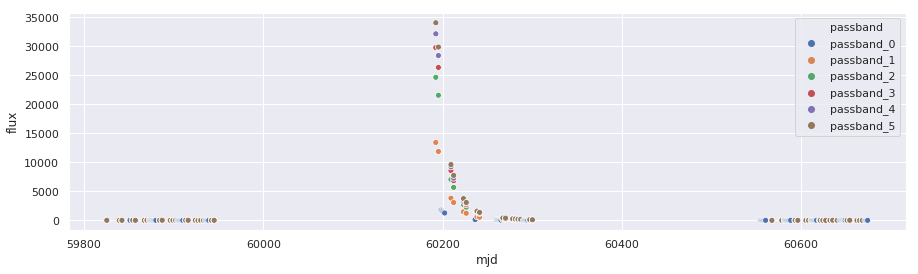

Class: class_53 

Object ID: 288194


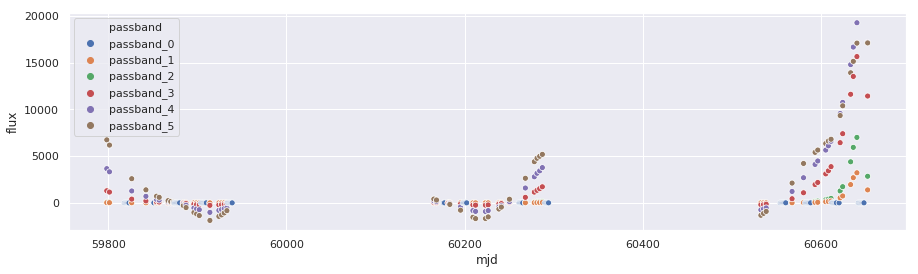

Object ID: 133773


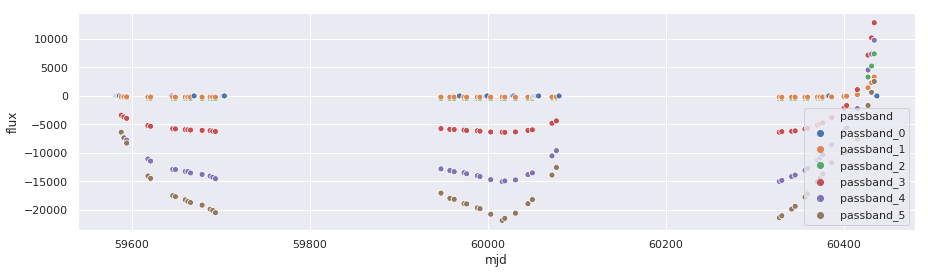

Object ID: 268977


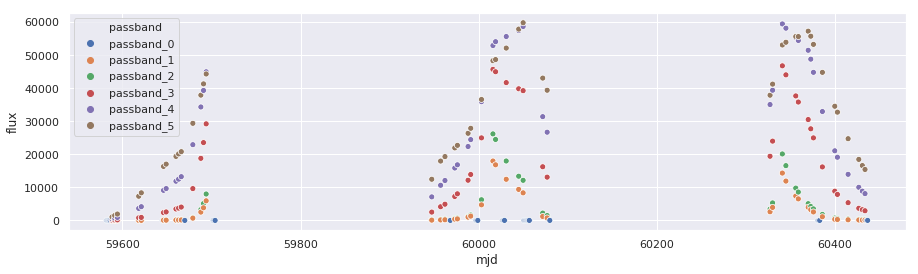

Object ID: 278480


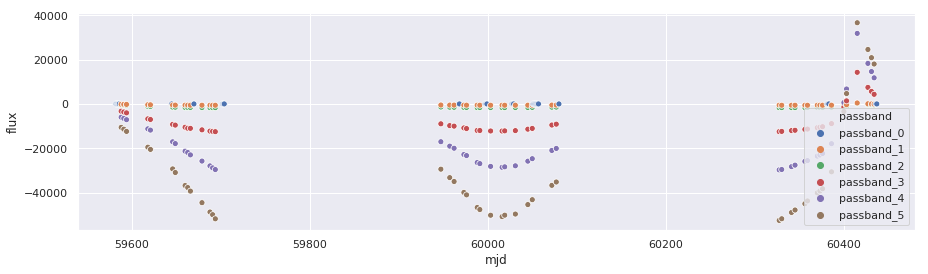

Object ID: 20578786


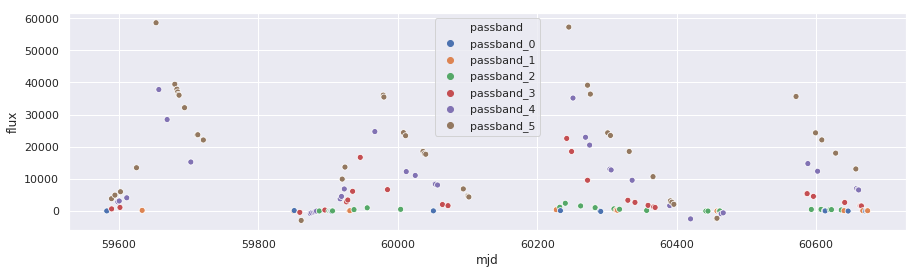

In [30]:
for class_id in galactic_classes:
    print('Class:', class_id, '\n')
    df_temp = df_train[df_train.target == class_id]
    obj_ids = df_temp.groupby('object_id').size().sort_values(ascending = False)
    for i in range(5):
        obj_id = obj_ids.index[i]
        print ('Object ID:', obj_id)
        plt.figure(figsize = (15, 4))
        ax = sns.scatterplot(x = 'mjd', y = 'flux', hue = 'passband', data = df_temp[df_temp.object_id == obj_id])
        plt.show()                              

## Extragalactic classes

Class: class_88 

Object ID: 245853


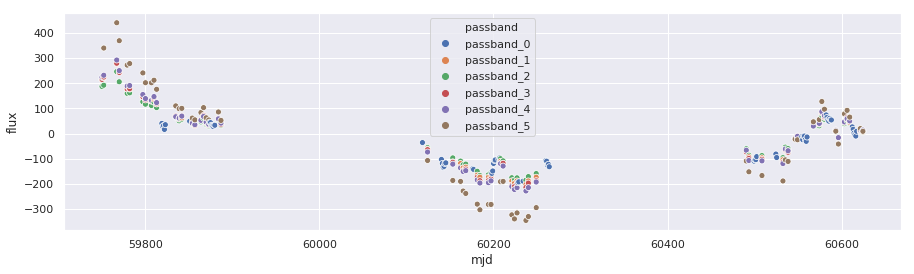

Object ID: 229471


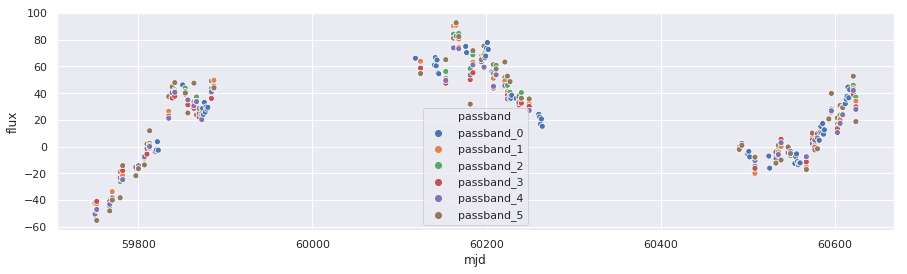

Object ID: 48749


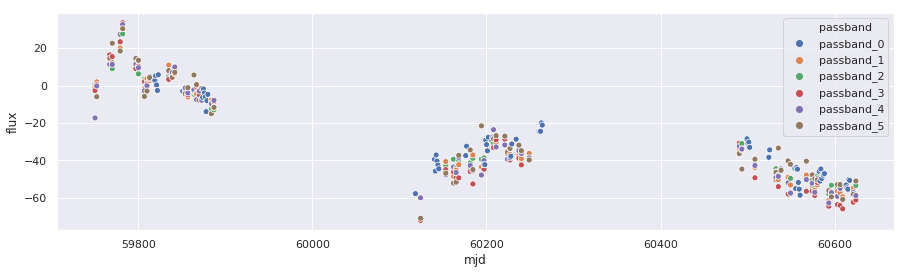

Object ID: 252575


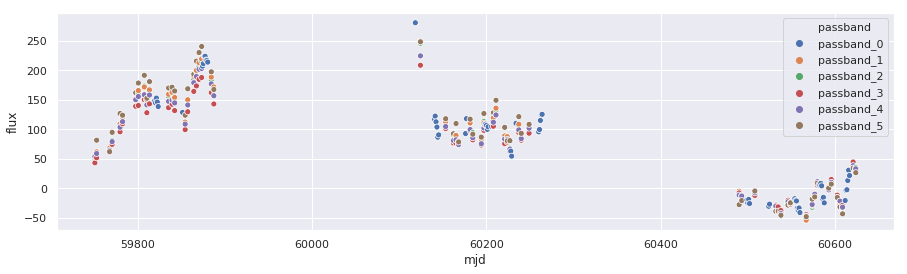

Object ID: 246759


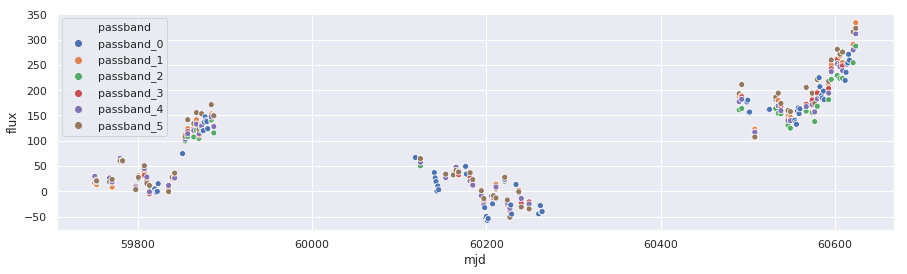

Class: class_42 

Object ID: 63860


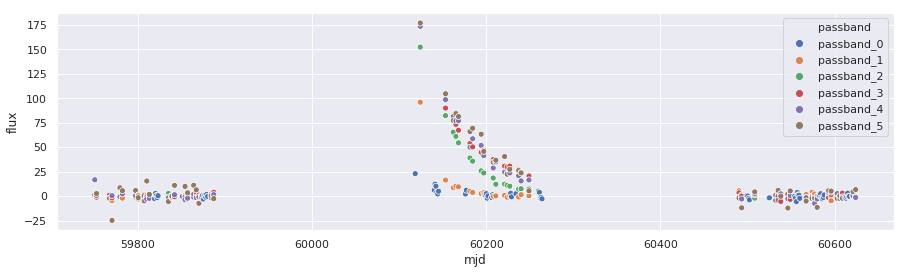

Object ID: 167310


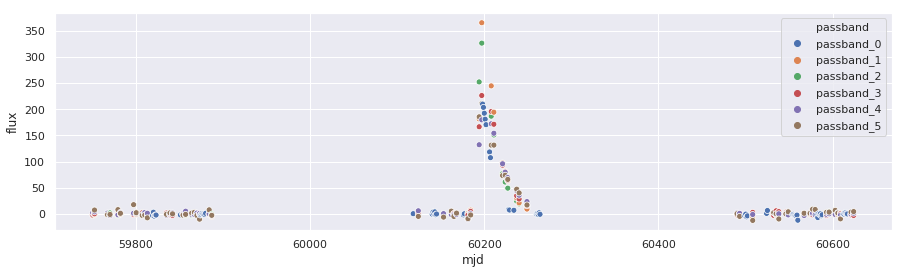

Object ID: 77825


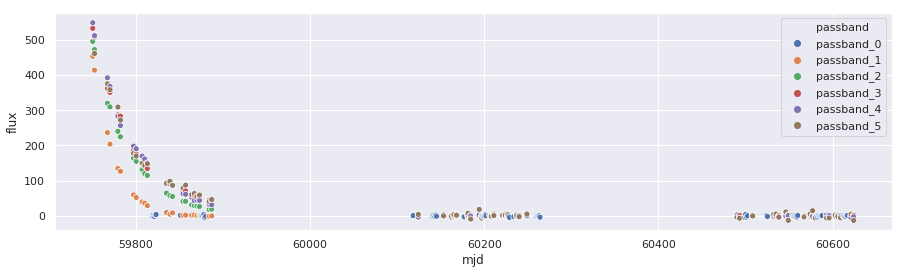

Object ID: 256581


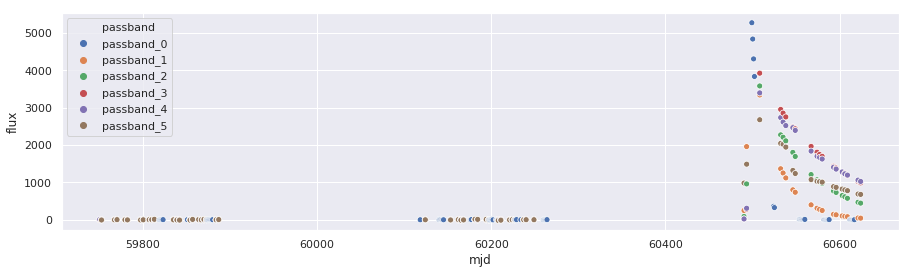

Object ID: 134824


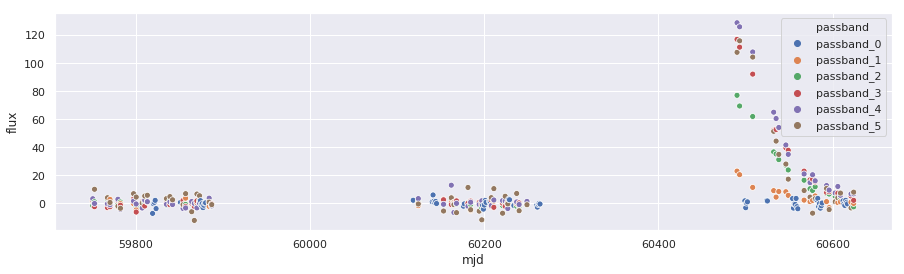

Class: class_90 

Object ID: 184895


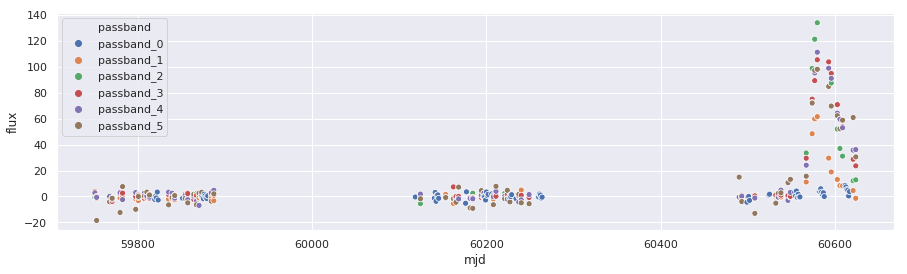

Object ID: 184663


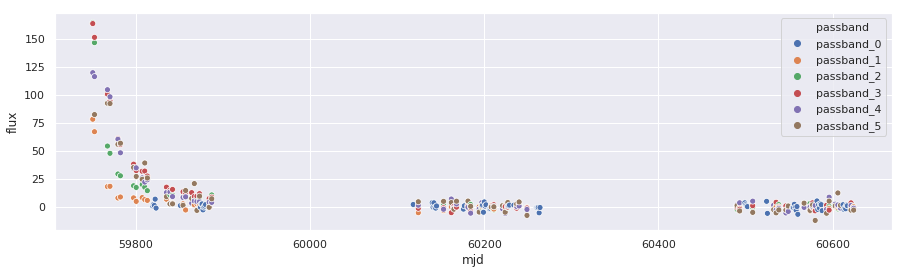

Object ID: 198788


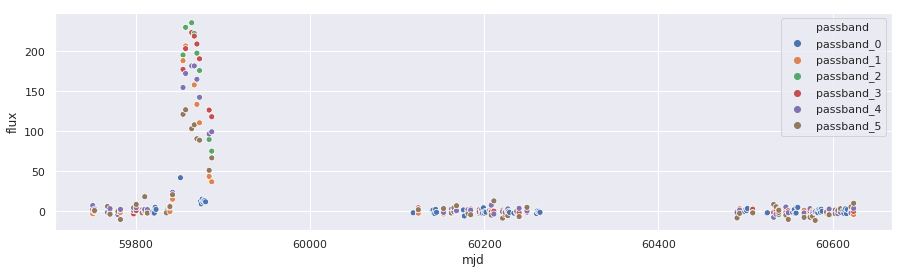

Object ID: 56461


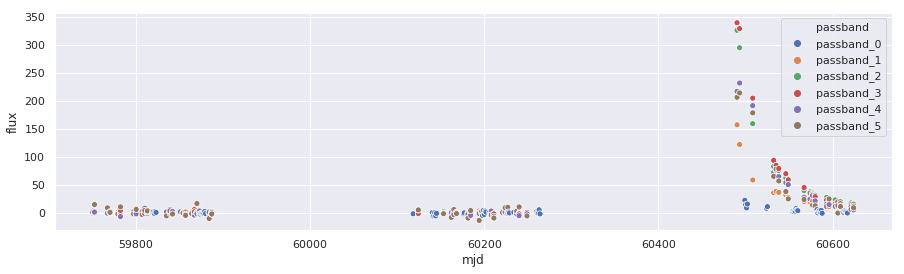

Object ID: 197784


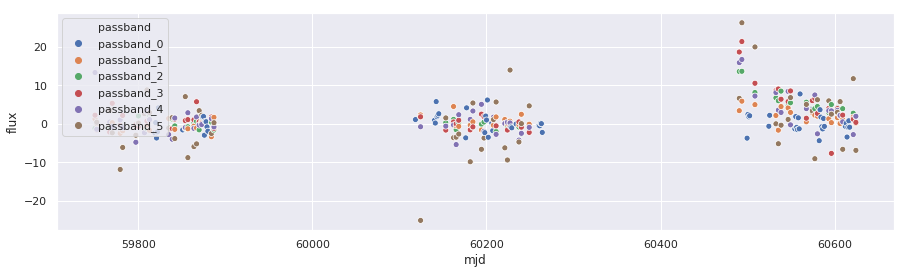

Class: class_67 

Object ID: 2922


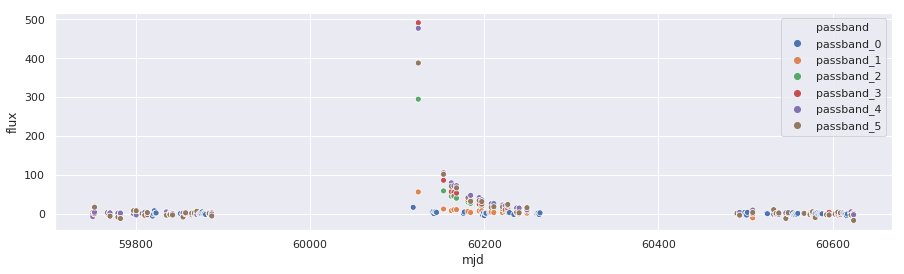

Object ID: 50277


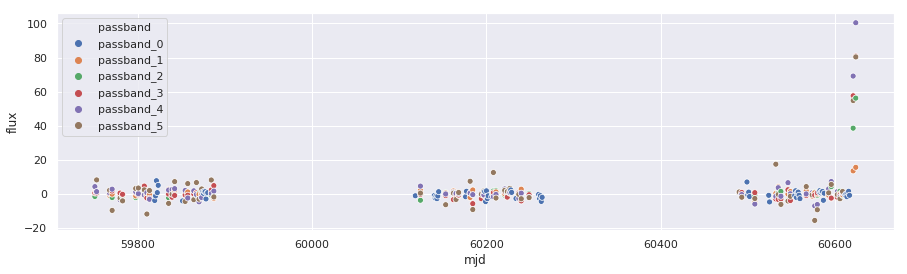

Object ID: 312565


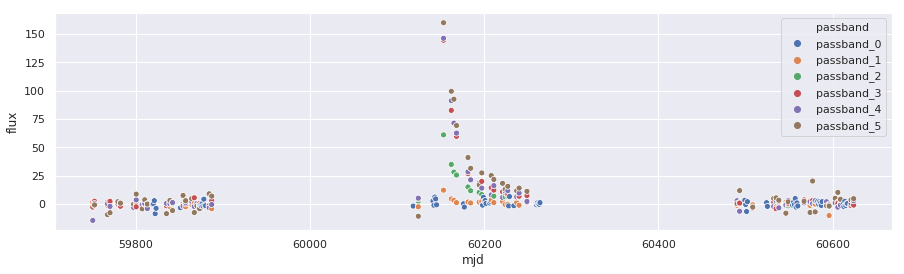

Object ID: 290676


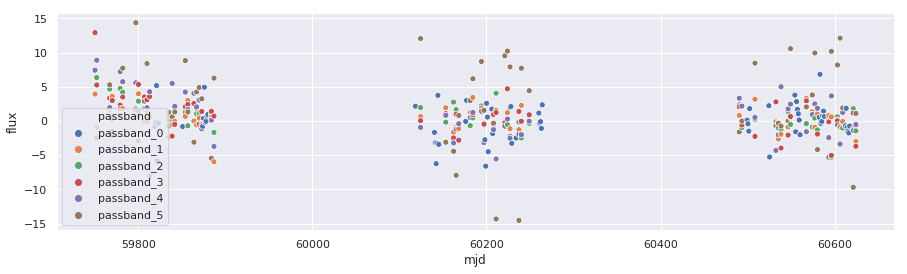

Object ID: 258452


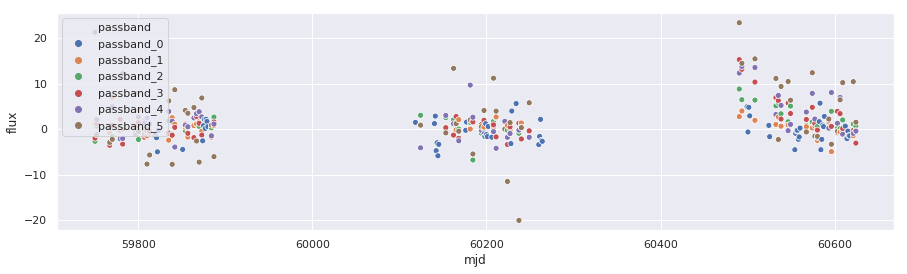

Class: class_95 

Object ID: 3423


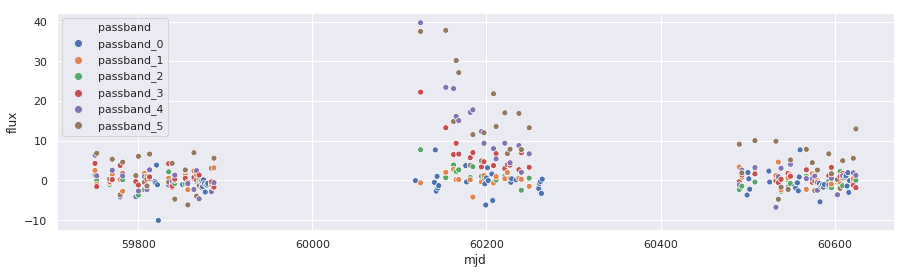

Object ID: 31569


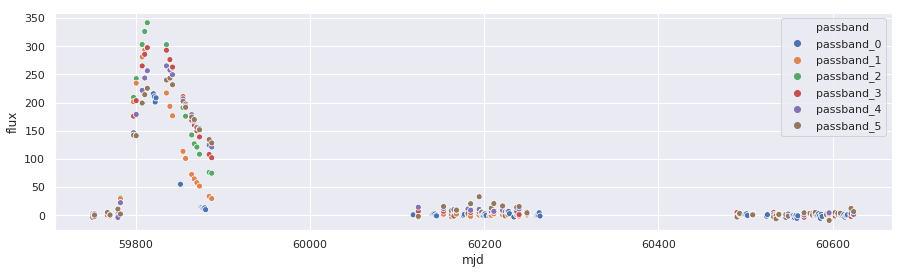

Object ID: 338456


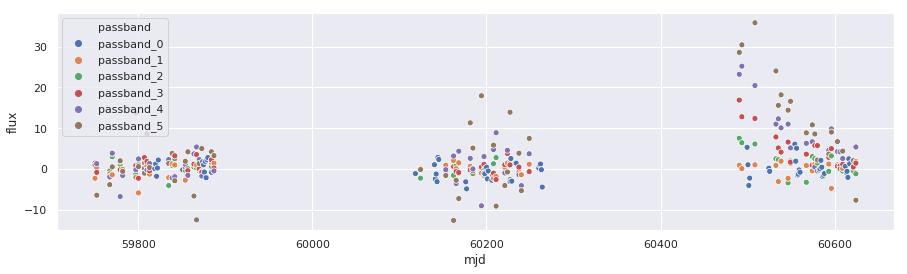

Object ID: 127996


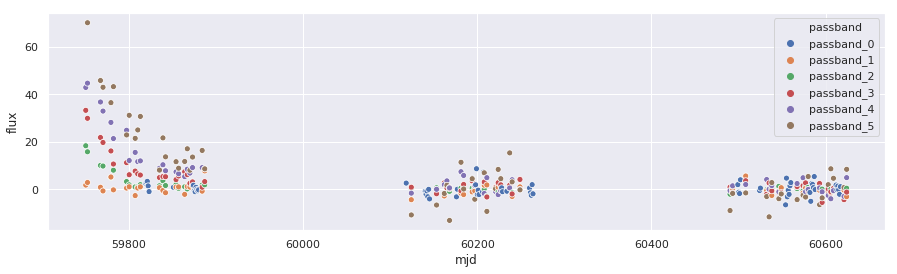

Object ID: 115336


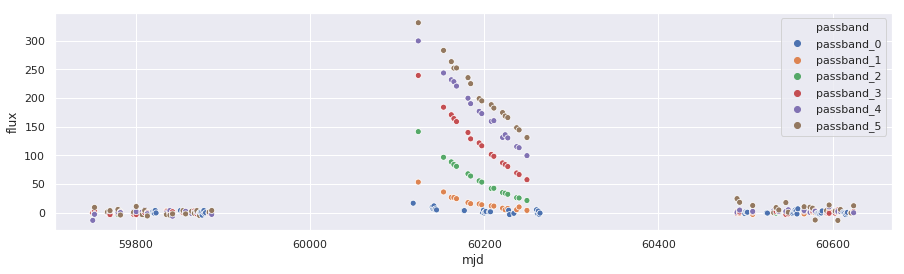

Class: class_62 

Object ID: 45060


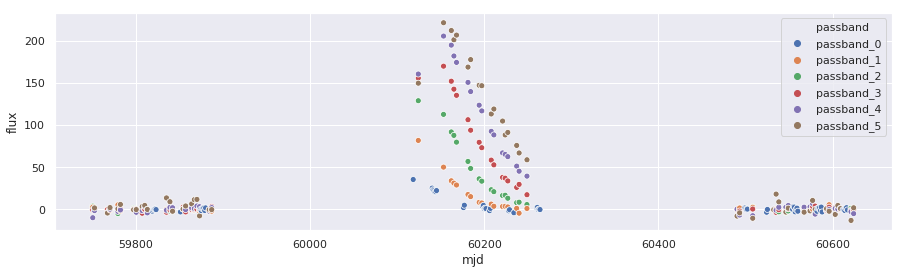

Object ID: 39846


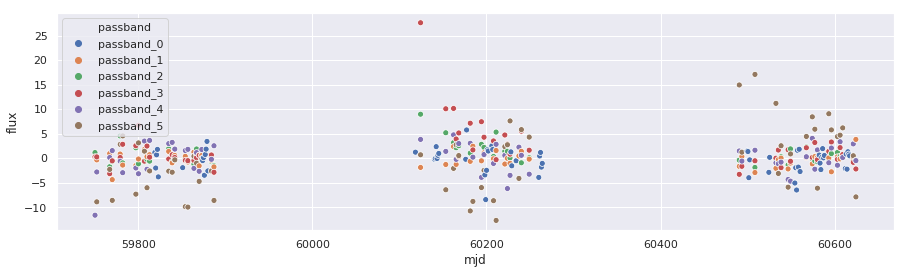

Object ID: 253634


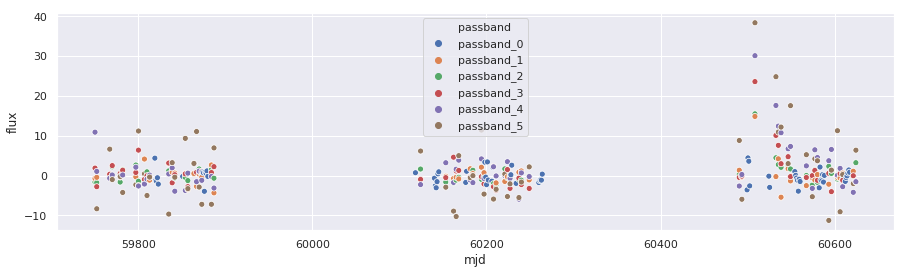

Object ID: 90814


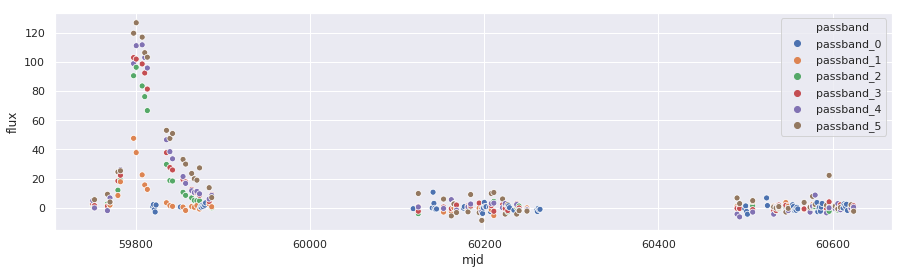

Object ID: 92904


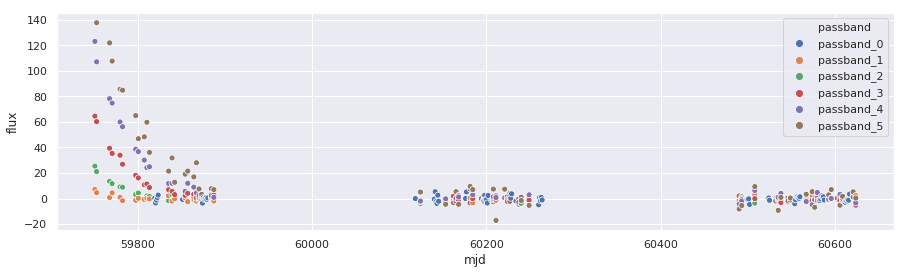

Class: class_15 

Object ID: 97406


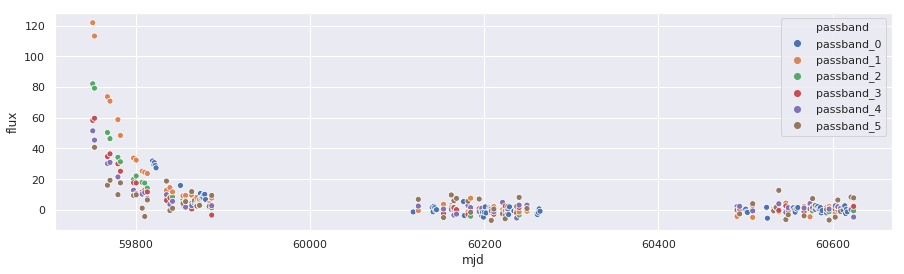

Object ID: 113669


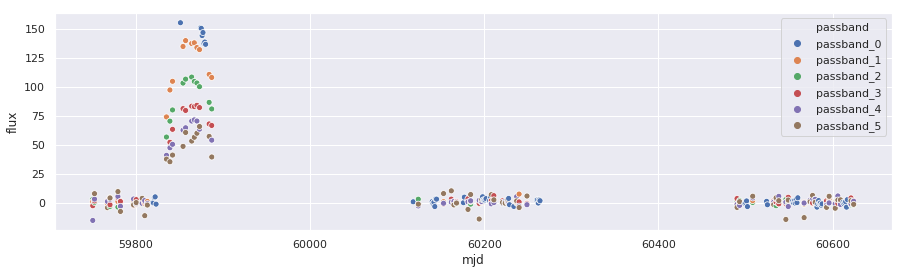

Object ID: 23116


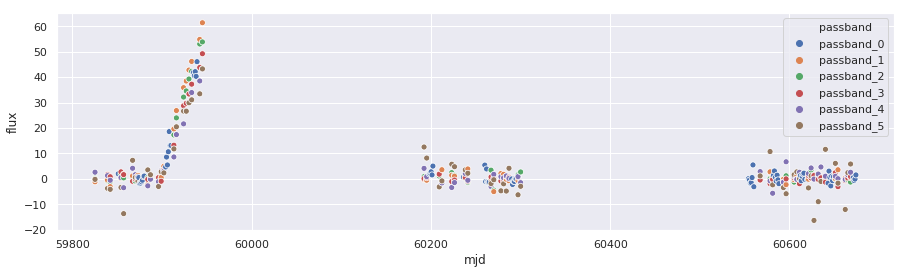

Object ID: 148996


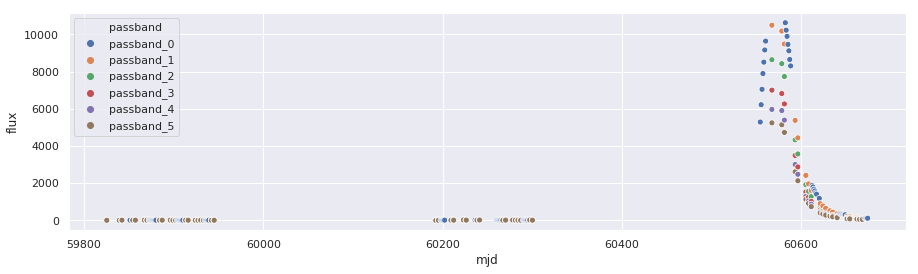

Object ID: 4173


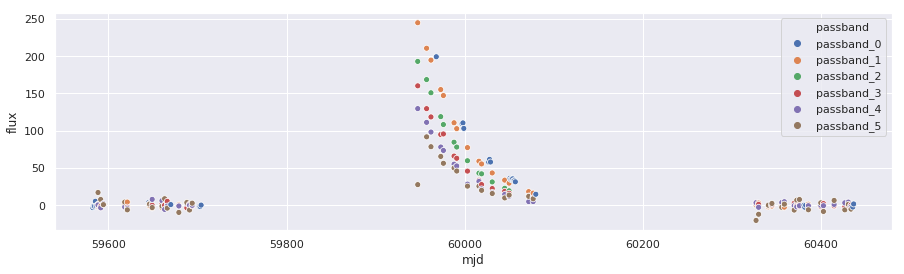

Class: class_52 

Object ID: 123437


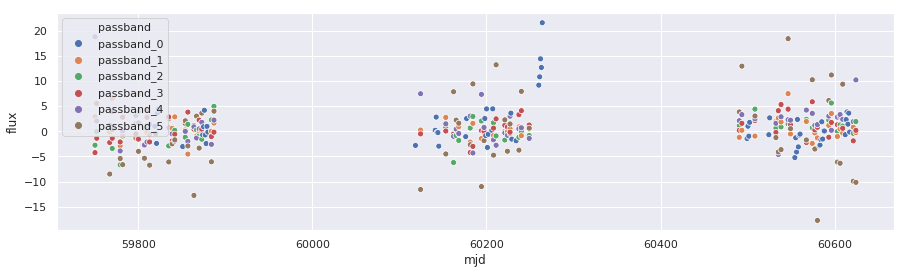

Object ID: 184218


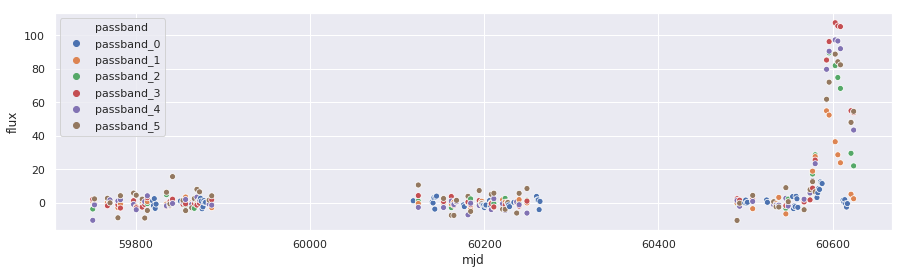

Object ID: 239080


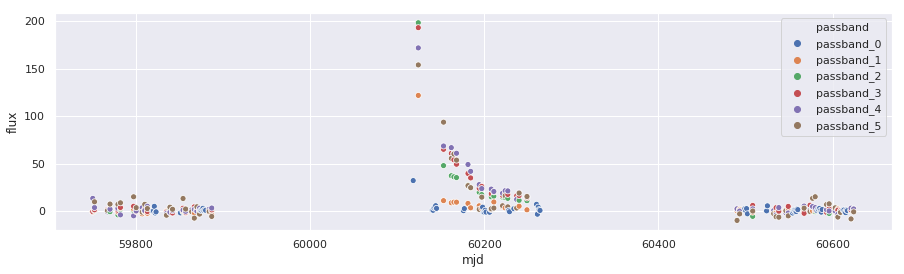

Object ID: 281632


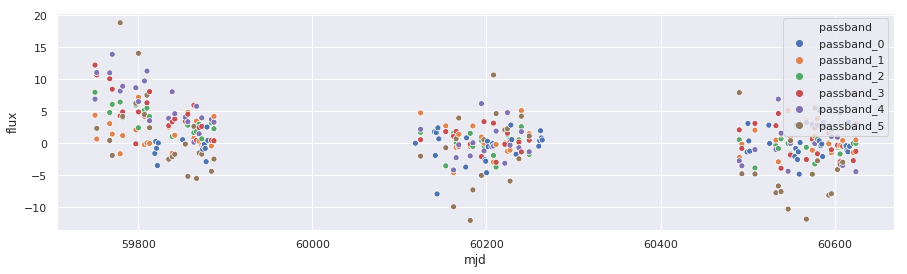

Object ID: 285912


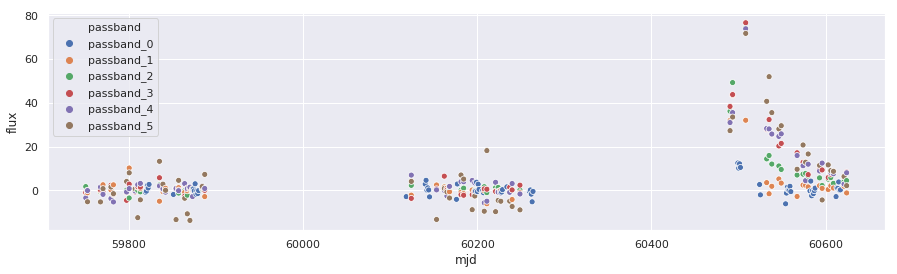

Class: class_64 

Object ID: 62187


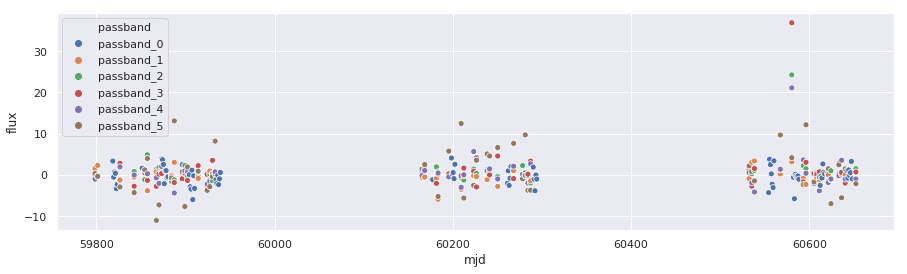

Object ID: 139362


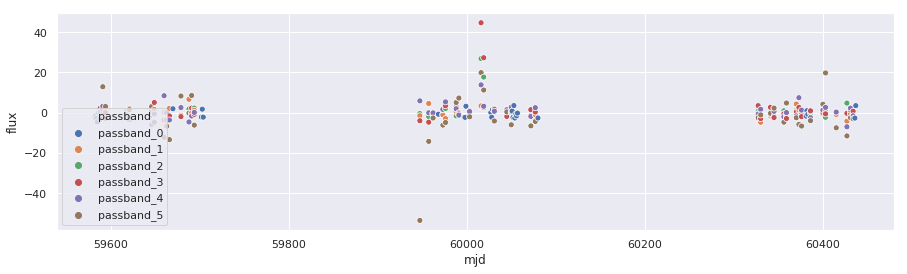

Object ID: 26684850


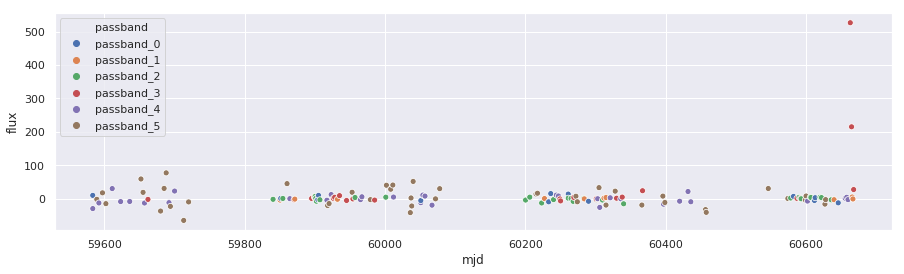

Object ID: 113851505


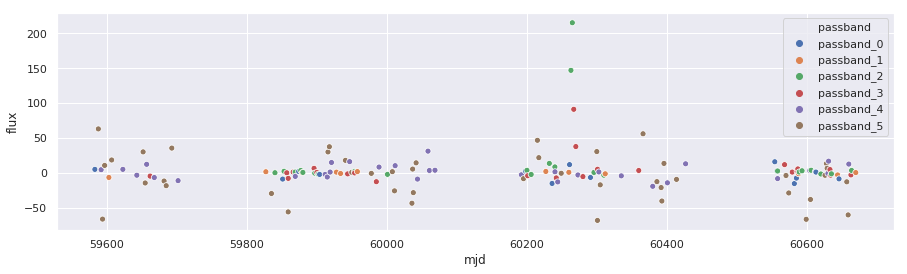

Object ID: 99449747


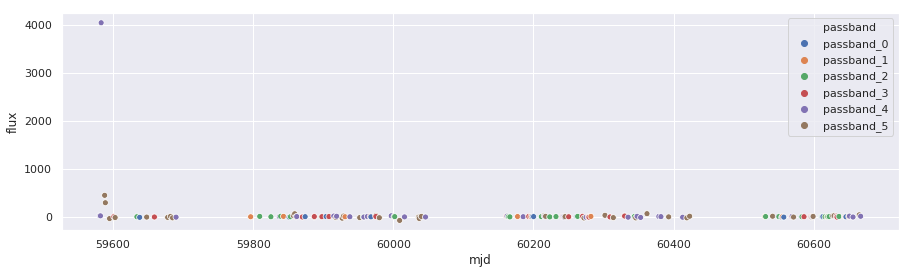

In [32]:
for class_id in extragalactic_classes:
    print('Class:', class_id, '\n')
    df_temp = df_train[df_train.target == class_id]
    obj_ids = df_temp.groupby('object_id').size().sort_values(ascending = False)
    for i in range(5):
        obj_id = obj_ids.index[i]
        print ('Object ID:', obj_id)
        plt.figure(figsize = (15, 4))
        ax = sns.scatterplot(x = 'mjd', y = 'flux', hue = 'passband', data = df_temp[df_temp.object_id == obj_id])
        plt.show()                              

In [35]:
df_train[df_train.object_id == 615].sort_values('passband')

,object_id,mjd,passband,flux,flux_err,detected,target
74,615,59851.1114,passband_0,-68.502457,3.338555,1,class_92
55,615,59820.1047,passband_0,39.364853,3.775619,1,class_92
54,615,59819.1532,passband_0,6.878784,3.633152,0,class_92
340,615,60616.0290,passband_0,120.849113,3.776495,1,class_92
242,615,60500.2437,passband_0,67.234062,4.020935,1,class_92
243,615,60501.2385,passband_0,24.868933,4.027500,1,class_92
109,615,59878.0246,passband_0,-102.768921,3.135772,1,class_92
244,615,60502.2355,passband_0,-15.392517,4.142292,0,class_92
341,615,60617.0295,passband_0,121.411896,3.569777,1,class_92
110,615,59879.0248,passband_0,-52.407089,3.261559,1,class_92


In [48]:
df_train[df_train.flux > 500000]

,object_id,mjd,passband,flux,flux_err,detected,target
894601,36551205,60100.2736,passband_5,5.830813e+05,4.959536e+03,1,class_6
894602,36551205,60101.3240,passband_4,5.342851e+05,5.150757e+03,1,class_6
894606,36551205,60127.1833,passband_5,6.142572e+05,5.226001e+03,1,class_6
894614,36551205,60159.1101,passband_5,5.166842e+05,4.401359e+03,1,class_6
1353318,118664463,59874.3418,passband_0,2.432809e+06,2.234069e+06,0,class_92
1353368,118664463,60236.3520,passband_0,5.191925e+05,1.219127e+06,0,class_92
1353406,118664463,60437.0361,passband_0,1.362498e+06,1.307368e+06,0,class_92


In [38]:
df_train[df_train.object_id == 118664463].sort_values('passband')

,object_id,mjd,passband,flux,flux_err,detected,target
1353291,118664463,59583.3082,passband_0,-3.211957e+05,9.509927e+05,0,class_92
1353327,118664463,59905.2556,passband_0,4.496242e+05,9.010344e+05,0,class_92
1353341,118664463,59964.0908,passband_0,3.090860e+04,1.082410e+06,0,class_92
1353368,118664463,60236.3520,passband_0,5.191925e+05,1.219127e+06,0,class_92
1353406,118664463,60437.0361,passband_0,1.362498e+06,1.307368e+06,0,class_92
1353412,118664463,60467.0136,passband_0,-1.149388e+06,1.858844e+06,0,class_92
1353376,118664463,60291.1966,passband_0,3.829180e+05,1.030278e+06,0,class_92
1353418,118664463,60612.3128,passband_0,-5.772038e+05,9.450186e+05,0,class_92
1353432,118664463,60671.1471,passband_0,-6.137275e+05,9.378268e+05,0,class_92
1353433,118664463,60672.1441,passband_0,4.584638e+05,9.193159e+05,0,class_92


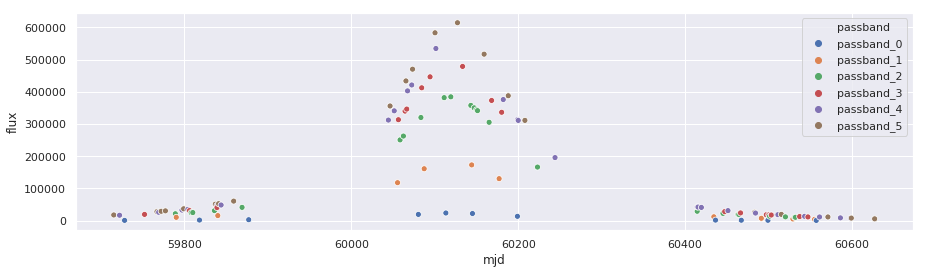

In [49]:
plt.figure(figsize = (15, 4))
ax = sns.scatterplot(x = 'mjd', y = 'flux', hue = 'passband', data = df_train[df_train.object_id == 36551205])